<a href="https://colab.research.google.com/github/Joojina/Joojina/blob/master/05_Karas1_lec_%EC%A3%BC%EC%A7%84%EC%95%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# keras임포트하고 데이터로드

In [0]:
from keras import backend as K
from keras.callbacks import TensorBoard

LOG_DIR = 'drive/data/tb_logs'
	
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
	
import os
if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)
	
get_ipython().system_raw('tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'.format(LOG_DIR))
	
get_ipython().system_raw('./ngrok http 6006 &')
	
!curl -s http://localhost:4040/api/tunnels | python3 -c \
"import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2020-03-04 02:49:10--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.20.12.96, 3.229.196.117, 52.206.168.246, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.20.12.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  34.0MB/s    in 0.4s    

2020-03-04 02:49:11 (34.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://8d6ecd3d.ngrok.io


## load MNIST data

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

11493376/11490434 [==============================] - 0s 0us/step


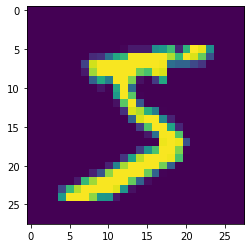

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # x: 이미지, y: 이미지의 데이터값(label)
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train sample')
print(x_test.shape[0], 'x_test sample')

60000 train sample
10000 x_test sample


In [0]:
num_classes = 10

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train', x_train[0])
print('y_train', y_train[0])

## Create Model

# 모델을 만듬. Sequential()층을 차례대로 쌓음

In [0]:
model = Sequential()

In [0]:
model.add(Dense(512, activation='relu', input_shape=(784,))) # input layer
model.add(Dense(512, activation='relu')) # hidden layer1
model.add(Dense(num_classes, activation='softmax')) # num_classes 같은 값 출력(output layer)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


#compile 메서드를 호출하여 학습 과정을 설정

In [0]:
# model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), metrics=['accuracy'])

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# fit으로 훈련

## Model fit

In [0]:
import tensorflow as tf

batch_size = 128 # 가중치
epochs = 10 # 반복
with tf.device('/device:GPU:0'):
#   history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks=[tbCallBack])
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 9s 147us/step - loss: 1.7078 - acc: 0.6264 - val_loss: 1.1149 - val_acc: 0.8063
Epoch 2/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.8031 - acc: 0.8404 - val_loss: 0.5605 - val_acc: 0.8749
Epoch 3/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.4892 - acc: 0.8807 - val_loss: 0.4058 - val_acc: 0.8991
Epoch 4/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.3862 - acc: 0.8987 - val_loss: 0.3420 - val_acc: 0.9099
Epoch 5/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.3360 - acc: 0.9090 - val_loss: 0.3068 - val_acc: 0.9180
Epoch 6/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.3049 - acc: 0.9164 - val_loss: 0.2836 - val_acc: 0.9222
Epoch 7/10
60000/600

In [0]:
  score = model.evaluate(x_test, y_test, verbose=0)
  print(model.metrics_names)
  print('test loss: ', score[0]) # 손실값
  print('test acc: ', score[1]) # 정확도

['loss', 'acc']
test loss:  0.22841864393651484
test acc:  0.9351


In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(history.history)

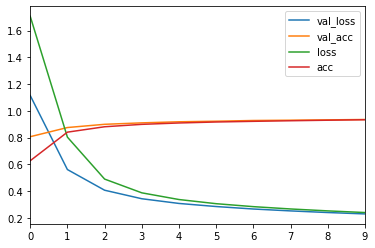

In [0]:
df = pd.DataFrame(history.history)
df.plot()

In [0]:
# 손실값loss는 줄어들고 정확도acc는 거의 1에 수렴